<h1> Unit 7 Homework</h1>
<h3> W203 Statistics for Data Science </h3>

Student Name: 

Section Number:

** Data: ** The file GPA1.RData contains data from a 1994 survey of MSU students.  The survey was conducted by Christopher Lemmon, a former MSU undergraduate, and provided by Wooldridge.

** Context: ** The skipped variable represents the average number of lectures each respondent skips per week.  You are interested in testing whether MSU students skip over 1 lecture per week on the average.

**1.0: ** Examine the skipped variable and argue whether or not a t-test is valid for this scenario. (3 points)

In [3]:
load('gpa1.RData')
ls()

[1] "data" "desc" "self"

In [8]:
skipped <- data$skipped

[1] 141

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   1.076   2.000   5.000 

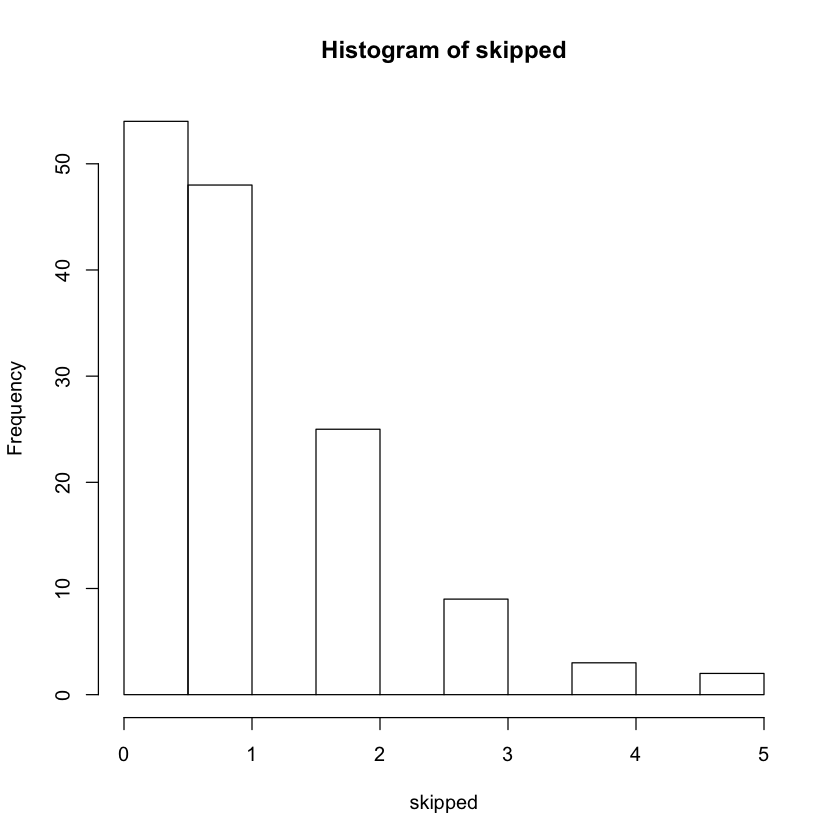

In [11]:
length(skipped)
summary(skipped)
hist(skipped)

In [ ]:
Skipped variable has range from 0 to 5 with median of 1 and mean of 1.076. 
Mean is larger than median, implying a positive skewed distribution. We can get same 
conclusion by looking at histogram too

t-test is valid.Although the histogram of skipped value does not follow normal distribution,
we have large enought sample size (141>30) for involking central limit theorem. 

**2.0: ** How would your answer to part a change if Mr. Lemmon selected dormitory rooms at random, then interviewed all occupants in the rooms he selected?  (3 points)

In [ ]:
Because assumptions of central limit theorem requires random sampling and each sample must be 
independent of each other, meaning that the occurrence of one event has no influence on the 
next event. By selecting dormitory rooms at random, it could lead to bias. For example, it could
end up with only male dorms or only female dorms, or only dorms under software school. This 
suggests that we may be seeing less variation in our data set than actually exists in the 
population, and the denominator in our t-statistics will be too small, exaggerating our results.
So this design is not rigorous enough for invoking central limit theorem, and t test will not be 
appropriate.

**3.0: ** Provide an argument for why you should choose a 2-tailed test in this instance, even if you are hoping to demonstrate that MSU students skip more than 1 lecture per week.  (3 points)

In [ ]:
1. your reader may not share the same theory that students skip over 1 lecture per week
2. The one tail test makes it easier to reject the null hypothesis, but there is no way to prove
to reader that we didnt start with two-tail test and then switch to one tail once seeing the
direction of the effect. That would be cheating and type 1 error would be greater than 0.05

**4.0: ** Conduct the t-test using the t.test function and interpret every component of the results.  (3 points)

In [12]:
t.test(skipped, mu = 1)


	One Sample t-test

data:  skipped
t = 0.83142, df = 140, p-value = 0.4072
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 0.8949445 1.2575377
sample estimates:
mean of x 
 1.076241 


In [ ]:
One sample t test: one sample is tested against null hypothesis
data: skipped: this is the vector of test data passed in for t test
t=0.83142: this is the value of t statistics for 2 tail test
df=140: this is the degree of freedom and it is equal to sample size - 1. 
the lower the degree of freedom, the fatter the tails in t distribution
p-value: this is the probability of getting data as extreme as the data we observe, 
assuming the null hypothesis is true. We got p value > 0.1 here, it implies not statistically
significant
alternative hypothesis: the null hypothesis is mean is equal to 1, so for two tail test, 
the alternative hypothesis is mean is not equal to 1
95 pcercent confidence interval: in the long run, 95% of the confidence interval we compute 
will contain mu
mean of x: this is the sample mean


**5.0: ** Show how you would compute the t-statistic and p-value manually (without using t.test), using the pt function in R.  (3 points)

In [23]:
x_bar = mean(skipped)
std_dev = sd(skipped)
len = length(skipped)
mu = 1
tstats <- (x_bar - mu)/(std_dev/sqrt(len))
tstats
pvalue <- 2 * (1-pt(tstats, 140))
pvalue

[1] 0.8314156

[1] 0.4071547

**6.0: ** Construct a 99% confidence interval for the mean number classes skipped by MSU students in a week.  (3 points)

In [26]:
x_bar + qt(c(0.005, 0.995), df = 140) * std_dev/sqrt(len)

[1] 0.8367745 1.3157078

** 7.0: ** Can you say that there is a 99% chance the population mean falls inside your confidence interval?  (3 points)

In [ ]:
No. Because population mean is fixed. The correct interpretation needs to use the objective
interpretation probability, which is about long run frequencies. In the long run, 99% confidence
interval we computed will contain population mean